# read dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

In [18]:
AI_Powered_Job_Market = pd.read_csv('ai_job_market_insights.csv')
AI_Powered_Job_Market.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [19]:
AI_Job_Threat_Index = pd.read_csv('My_Data.csv')
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


# Data cleaning and exploration

### Dataset 1

In [20]:
AI_Powered_Job_Market.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [21]:
print("\nMissing values in each column:")
print(AI_Powered_Job_Market.isnull().sum())


Missing values in each column:
Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64


In [61]:
AI_Powered_Job_Market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [63]:
for col in AI_Powered_Job_Market.select_dtypes(include=['object']).columns:
    AI_Powered_Job_Market[col] = AI_Powered_Job_Market[col].astype('category')
AI_Powered_Job_Market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Job_Title              500 non-null    category
 1   Industry               500 non-null    category
 2   Company_Size           500 non-null    category
 3   Location               500 non-null    category
 4   AI_Adoption_Level      500 non-null    category
 5   Automation_Risk        500 non-null    category
 6   Required_Skills        500 non-null    category
 7   Salary_USD             500 non-null    float64 
 8   Remote_Friendly        500 non-null    category
 9   Job_Growth_Projection  500 non-null    category
dtypes: category(9), float64(1)
memory usage: 10.5 KB


##### EDA

In [64]:
import seaborn as sns
plt.figure(figsize=(10, 6))  

for col in AI_Powered_Job_Market.columns:
    if AI_Powered_Job_Market[col].dtype == 'object':
        sns.countplot(y=col, data=AI_Powered_Job_Market, order=AI_Powered_Job_Market[col].value_counts().index)

        plt.title(f'Count of {col}')
        plt.xlabel('Count')
        plt.ylabel(f'{col}')

        plt.show()

<Figure size 1000x600 with 0 Axes>

In [23]:
AI_Powered_Job_Market.groupby('Job_Title')['AI_Adoption_Level'].value_counts().unstack()

AI_Adoption_Level,High,Low,Medium
Job_Title,,,
AI Researcher,15,18,18
Cybersecurity Analyst,15,19,21
Data Scientist,21,22,19
HR Manager,14,18,25
Marketing Specialist,16,15,17
Operations Manager,8,17,19
Product Manager,14,13,12
Sales Manager,16,16,17
Software Engineer,13,15,13


In [24]:
(AI_Powered_Job_Market[AI_Powered_Job_Market['AI_Adoption_Level'] == 'High'].groupby('Job_Title')['AI_Adoption_Level'].value_counts()
 / AI_Powered_Job_Market.groupby('Job_Title')['AI_Adoption_Level'].count()).unstack()

AI_Adoption_Level,High
Job_Title,
AI Researcher,0.294118
Cybersecurity Analyst,0.272727
Data Scientist,0.338710
HR Manager,0.245614
Marketing Specialist,0.333333
Operations Manager,0.181818
Product Manager,0.358974
Sales Manager,0.326531
Software Engineer,0.317073


In [25]:
AI_Powered_Job_Market.groupby('Job_Title')['Job_Growth_Projection'].value_counts().unstack()

Job_Growth_Projection,Decline,Growth,Stable
Job_Title,,,
AI Researcher,16,20,15
Cybersecurity Analyst,19,14,22
Data Scientist,23,22,17
HR Manager,22,14,21
Marketing Specialist,23,11,14
Operations Manager,7,19,18
Product Manager,10,15,14
Sales Manager,16,19,14
Software Engineer,12,16,13


In [26]:
(AI_Powered_Job_Market[AI_Powered_Job_Market['Job_Growth_Projection'] == 'Decline'].groupby('Job_Title')['Job_Growth_Projection'].value_counts()
 / AI_Powered_Job_Market.groupby('Job_Title')['Job_Growth_Projection'].count()).unstack()

Job_Growth_Projection,Decline
Job_Title,
AI Researcher,0.313725
Cybersecurity Analyst,0.345455
Data Scientist,0.370968
HR Manager,0.385965
Marketing Specialist,0.479167
Operations Manager,0.159091
Product Manager,0.256410
Sales Manager,0.326531
Software Engineer,0.292683


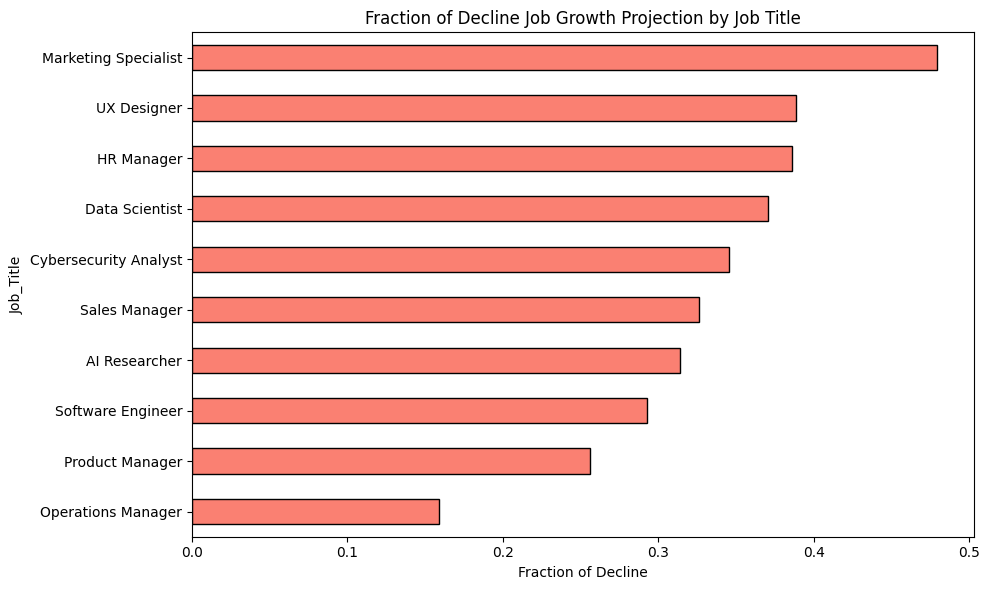

In [27]:
import matplotlib.pyplot as plt

decline_counts = AI_Powered_Job_Market[AI_Powered_Job_Market['Job_Growth_Projection'] == 'Decline'].groupby('Job_Title')['Job_Growth_Projection'].count()

total_counts = AI_Powered_Job_Market.groupby('Job_Title')['Job_Growth_Projection'].count()

decline_fraction = decline_counts / total_counts

decline_fraction = decline_fraction.sort_values()

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
decline_fraction.plot(kind='barh', color='salmon', edgecolor='black')
plt.xlabel('Fraction of Decline')
plt.title('Fraction of Decline Job Growth Projection by Job Title')
plt.tight_layout()
plt.show()


In [28]:
Job_average_salary = AI_Powered_Job_Market.groupby('Job_Title')['Salary_USD'].mean().reset_index()
Job_average_salary

,Job_Title,Salary_USD
0,AI Researcher,95583.346966
1,Cybersecurity Analyst,89429.064689
2,Data Scientist,91480.756134
3,HR Manager,89251.780747
4,Marketing Specialist,90961.147148
5,Operations Manager,96937.230841
6,Product Manager,90802.642422
7,Sales Manager,92926.644659
8,Software Engineer,84490.542038
9,UX Designer,90157.291938


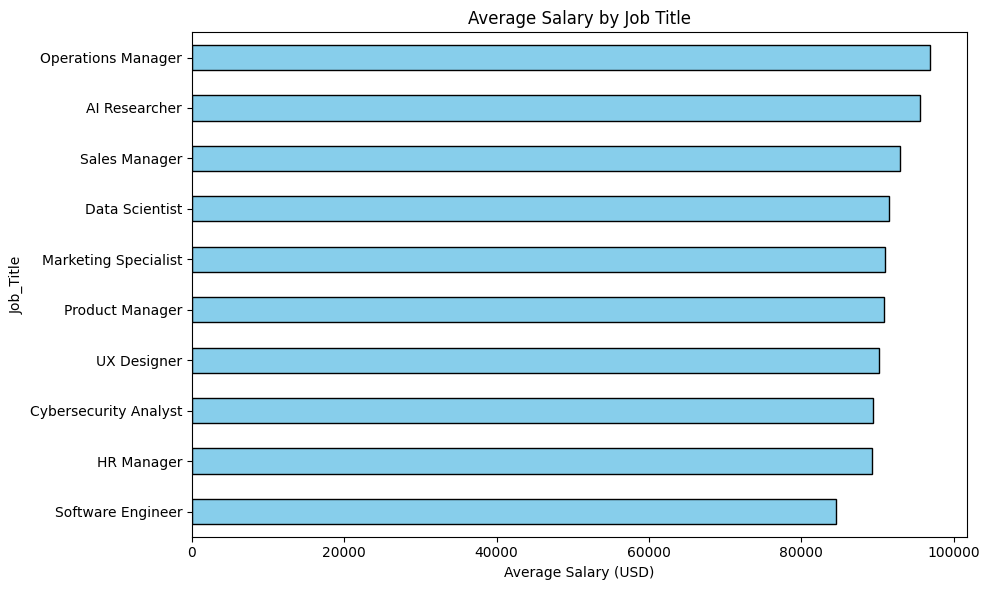

In [29]:
mean_salary = AI_Powered_Job_Market.groupby('Job_Title')['Salary_USD'].mean().sort_values()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
mean_salary.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Average Salary (USD)')
plt.title('Average Salary by Job Title')
plt.tight_layout()
plt.show()

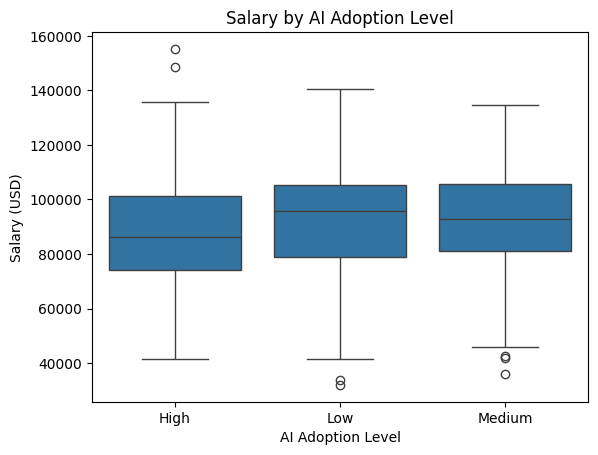

In [65]:


plt.figure()
sns.boxplot(x='AI_Adoption_Level', y='Salary_USD', data=AI_Powered_Job_Market
)
plt.title('Salary by AI Adoption Level')
plt.xlabel('AI Adoption Level')
plt.ylabel('Salary (USD)')
plt.show()


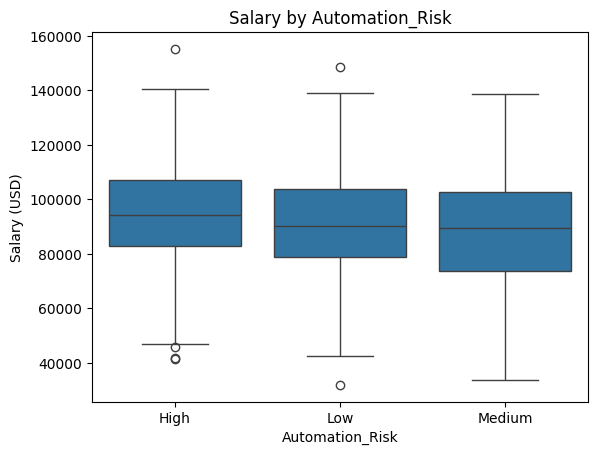

In [66]:
import seaborn as sns

plt.figure()
sns.boxplot(x='Automation_Risk', y='Salary_USD', data=AI_Powered_Job_Market
)
plt.title('Salary by Automation_Risk')
plt.xlabel('Automation_Risk')
plt.ylabel('Salary (USD)')
plt.show()


In [67]:
import itertools
col = AI_Powered_Job_Market.columns.drop('Salary_USD')
formulas = []
for r in range(len(col) + 1):
    for combo in itertools.combinations(col, r):
        # For the empty subset, use a null model indicator (using 1 as a placeholder)
        if not combo:
            formula = "Salary_USD ~ 1"
        else:
            formula = "Salary_USD ~ " + " + ".join(combo)
        formulas.append(formula)
formulas[-10:]

['Salary_USD ~ Job_Title + Industry + Company_Size + Location + AI_Adoption_Level + Automation_Risk + Required_Skills + Remote_Friendly',
 'Salary_USD ~ Job_Title + Industry + Company_Size + Location + AI_Adoption_Level + Automation_Risk + Required_Skills + Job_Growth_Projection',
 'Salary_USD ~ Job_Title + Industry + Company_Size + Location + AI_Adoption_Level + Automation_Risk + Remote_Friendly + Job_Growth_Projection',
 'Salary_USD ~ Job_Title + Industry + Company_Size + Location + AI_Adoption_Level + Required_Skills + Remote_Friendly + Job_Growth_Projection',
 'Salary_USD ~ Job_Title + Industry + Company_Size + Location + Automation_Risk + Required_Skills + Remote_Friendly + Job_Growth_Projection',
 'Salary_USD ~ Job_Title + Industry + Company_Size + AI_Adoption_Level + Automation_Risk + Required_Skills + Remote_Friendly + Job_Growth_Projection',
 'Salary_USD ~ Job_Title + Industry + Location + AI_Adoption_Level + Automation_Risk + Required_Skills + Remote_Friendly + Job_Growth_Pro

In [ ]:
def criterion(formula, df):
    """
    Calculate the BIC for a given regression model formula and given dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.ols(formula, df).fit()
    criterion_value = model.bic 
    return criterion_value

def remove(df, already_selected_columns, criterion, response='y'):

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for i in already_selected_columns:
        new_columns = already_selected_columns - {i}
        if new_columns:
            formula = f'{response} ~ {" + ".join(new_columns)}'
        else:
            formula = f'{response} ~ 1'
        # formula = f'{response} ~ {" + ".join(new_columns)}'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = i
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    best = criterion(f'{response} ~ {" + ".join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential, current = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current <= best:
            already_selected_columns = already_selected_columns - {potential}
            best = current
            print(f'Criterion: {best}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

backward_vars = backward(AI_Powered_Job_Market, criterion, "Salary_USD")
backward_vars

Criterion: 11524.209260937474
Criterion: 11478.887800216358
Criterion: 11434.692787946831
Criterion: 11391.343613045012
Criterion: 11379.85814913987
Criterion: 11368.826662723724
Criterion: 11362.684809920465
Criterion: 11356.83501072544
Criterion: 11352.541622379904


set()

### Dataset 2

In [34]:
print("\nSummary statistics:")
print(AI_Job_Threat_Index.describe())


Summary statistics:
             Tasks    AI models  AI_Workload_Ratio
count  4706.000000  4706.000000        4706.000000
mean    400.708032  1817.678071                inf
std     311.564781  1086.853037                NaN
min       1.000000     0.000000           0.036585
25%     161.000000  1085.250000           0.137271
50%     270.000000  1577.500000           0.199281
75%     608.750000  2273.000000           0.260572
max    1387.000000  5666.000000                inf


C:\Users\jessi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


##### Check for missing values

In [35]:
print("\nMissing values in each column:")
print(AI_Job_Threat_Index.isnull().sum())


Missing values in each column:
Job titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64


##### Change AI Impack to float instead of string

In [36]:
AI_Job_Threat_Index['AI Impact'] = AI_Job_Threat_Index['AI Impact'].str.rstrip('%').astype(float)/ 100

### EDA

##### Dataset2

In [37]:
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


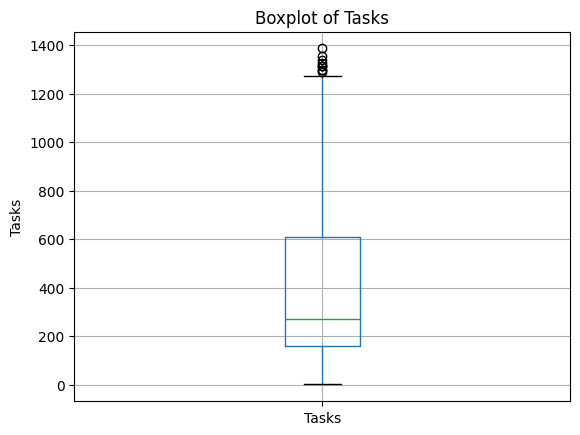

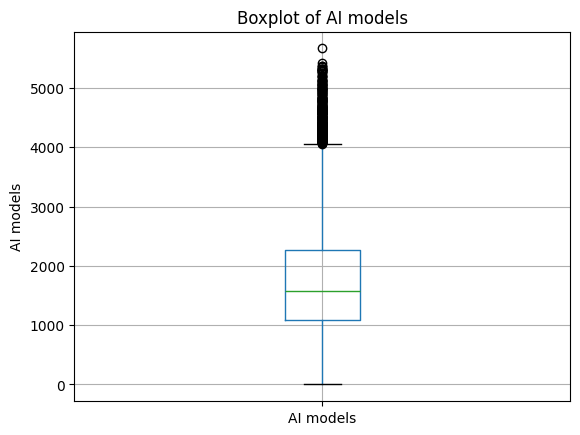

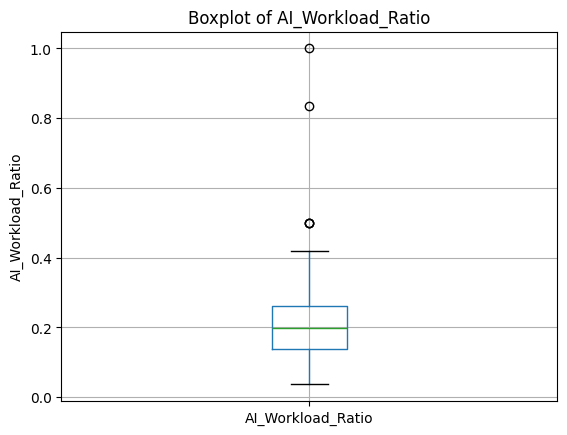

In [38]:
quant_features = ['Tasks', 'AI models', 'AI_Workload_Ratio']
for col in quant_features:
    plt.figure()
    AI_Job_Threat_Index.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [39]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


In [ ]:
filtered_df = AI_Job_Threat_Index.copy()
for col in quant_features:
    filtered_df = remove_outliers(filtered_df, col)

filtered_df.columns = filtered_df.columns.str.replace(' ', '_')
filtered_df.head()

,Job_titiles,AI_Impact,Tasks,AI_models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


In [57]:
filtered_df.info()
filtered_df['Job_titiles'] = filtered_df['Job_titiles'].astype('category')
filtered_df['Domain'] = filtered_df['Domain'].astype('category')

<class 'pandas.core.frame.DataFrame'>
Index: 4420 entries, 0 to 4705
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Job_titiles        4420 non-null   category
 1   AI_Impact          4420 non-null   float64 
 2   Tasks              4420 non-null   int64   
 3   AI_models          4420 non-null   int64   
 4   AI_Workload_Ratio  4420 non-null   float64 
 5   Domain             4420 non-null   category
dtypes: category(2), float64(2), int64(2)
memory usage: 349.5 KB


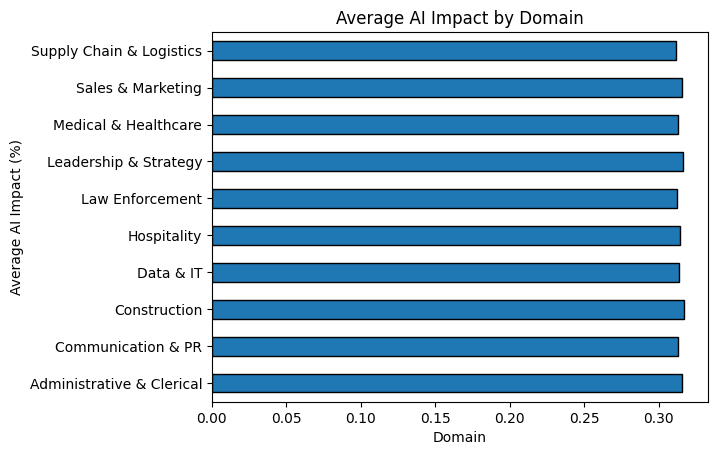

In [41]:
avg_impact_by_domain = filtered_df.groupby('Domain')['AI_Impact'].mean()

plt.figure()
avg_impact_by_domain.plot(kind='barh', edgecolor='black')
plt.title("Average AI Impact by Domain")
plt.xlabel("Domain")
plt.ylabel("Average AI Impact (%)")
plt.show()

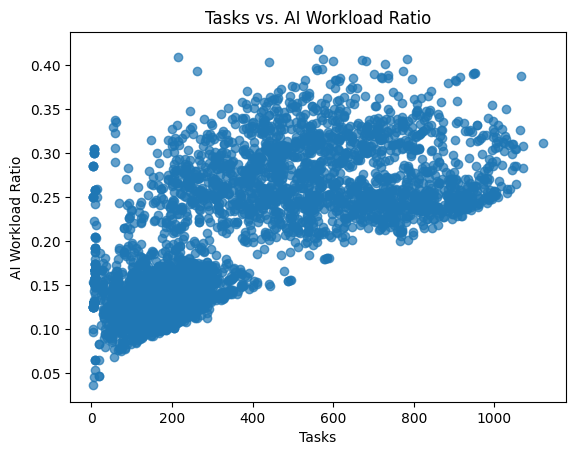

In [42]:
# Scatter plot: Tasks vs. AI Workload Ratio
plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Tasks vs. AI Workload Ratio")
plt.xlabel("Tasks")
plt.ylabel("AI Workload Ratio")
plt.show()

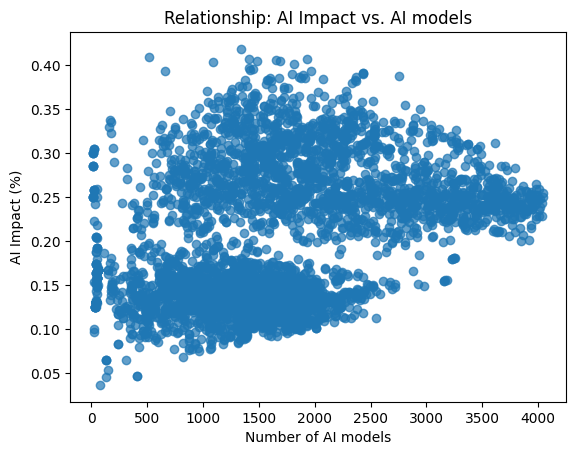

Correlation between AI Impact and AI models: 0.36667870771290856


In [44]:
# Scatter plot for AI Impact vs. AI models
from scipy.stats import pearsonr
plt.figure()
plt.scatter(filtered_df['AI_models'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI_models'], filtered_df['AI_Workload_Ratio'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

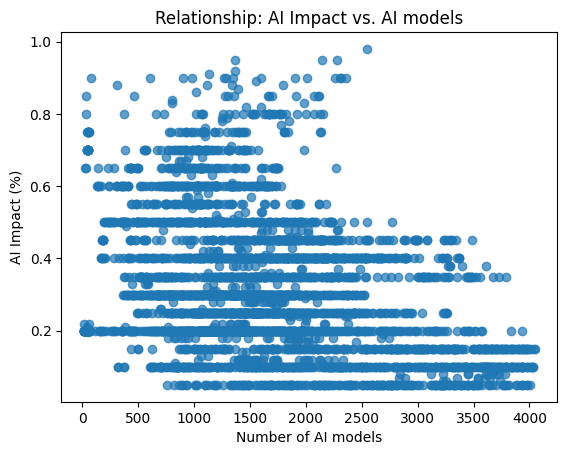

Correlation between AI Impact and AI models: -0.35089333753136176


In [45]:
# Scatter plot for AI Impact vs. AI models
plt.figure()
plt.scatter(filtered_df['AI_models'], filtered_df['AI_Impact'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI_models'], filtered_df['AI_Impact'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

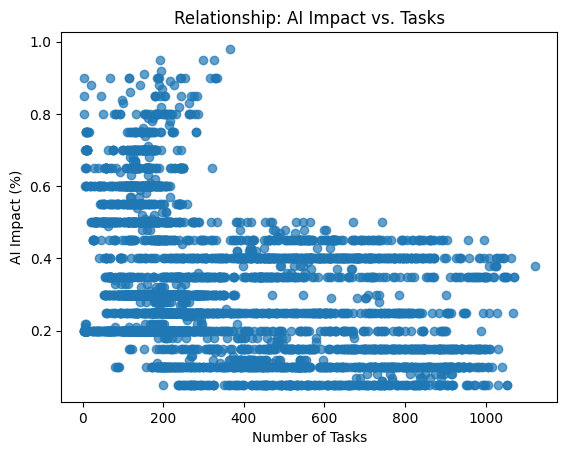

Correlation between AI Impact and Tasks: -0.3583205375514259


In [46]:

plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI_Impact'], alpha=0.7)
plt.title("Relationship: AI Impact vs. Tasks")
plt.xlabel("Number of Tasks")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(filtered_df['Tasks'], filtered_df['AI_Impact'])
print("Correlation between AI Impact and Tasks:", corr_coef)

In [77]:
import itertools
col = ['Tasks', 'AI_models', 'AI_Workload_Ratio']
col = filtered_df.columns.drop('AI_Impact')
formulas = []
for r in range(len(col) + 1):
    for combo in itertools.combinations(col, r):
        # For the empty subset, use a null model indicator (using 1 as a placeholder)
        if not combo:
            formula = "AI_Impact ~ 1"
        else:
            formula = "AI_Impact ~ " + " + ".join(combo)
        formulas.append(formula)
formulas[-10:]

['AI_Impact ~ Tasks + AI_models + AI_Workload_Ratio',
 'AI_Impact ~ Tasks + AI_models + Domain',
 'AI_Impact ~ Tasks + AI_Workload_Ratio + Domain',
 'AI_Impact ~ AI_models + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Job_titiles + Tasks + AI_models + AI_Workload_Ratio',
 'AI_Impact ~ Job_titiles + Tasks + AI_models + Domain',
 'AI_Impact ~ Job_titiles + Tasks + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Job_titiles + AI_models + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Tasks + AI_models + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Job_titiles + Tasks + AI_models + AI_Workload_Ratio + Domain']

In [81]:
def criterion(formula, df):
    """
    Calculate the BIC for a given regression model formula and given dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.ols(formula, df).fit()
    criterion_value = model.bic 
    return criterion_value

def remove(df, already_selected_columns, criterion, response='y'):

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for i in already_selected_columns:
        new_columns = already_selected_columns - {i}
        if new_columns:
            formula = f'{response} ~ {" + ".join(new_columns)}'
        else:
            formula = f'{response} ~ 1'
        # formula = f'{response} ~ {" + ".join(new_columns)}'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = i
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    best = criterion(f'{response} ~ {" + ".join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential, current = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current <= best:
            already_selected_columns = already_selected_columns - {potential}
            best = current
            print(f'Criterion: {best}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

backward_vars = backward(filtered_df[['Tasks', 'AI_models', 'AI_Workload_Ratio', "AI_Impact"]], criterion, "AI_Impact")
backward_vars

{'AI_Workload_Ratio', 'AI_models', 'Tasks'}

In [102]:
covariate = ' + '.join(backward_vars)
model = smf.ols(f'AI_Impact ~ {covariate}', data = filtered_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AI_Impact   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     279.0
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          7.35e-166
Time:                        20:43:29   Log-Likelihood:                 1652.0
No. Observations:                4420   AIC:                            -3296.
Df Residuals:                    4416   BIC:                            -3270.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6260      0.01

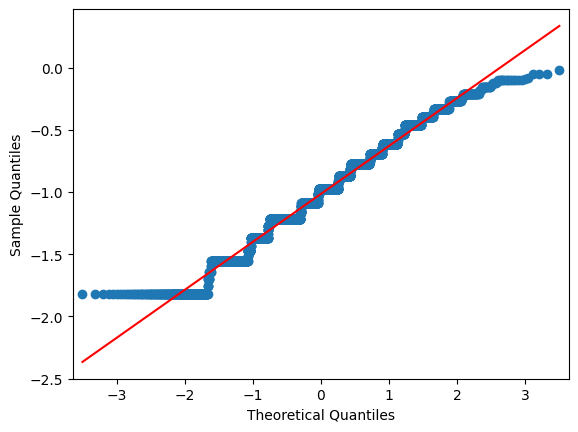

In [103]:
import scipy.stats as stats
import statsmodels.api as sm
df = filtered_df[['Tasks', 'AI_models', 'AI_Workload_Ratio', "AI_Impact"]]
yt, _ = stats.boxcox(df.AI_Impact)
sm.qqplot(yt, line="r");

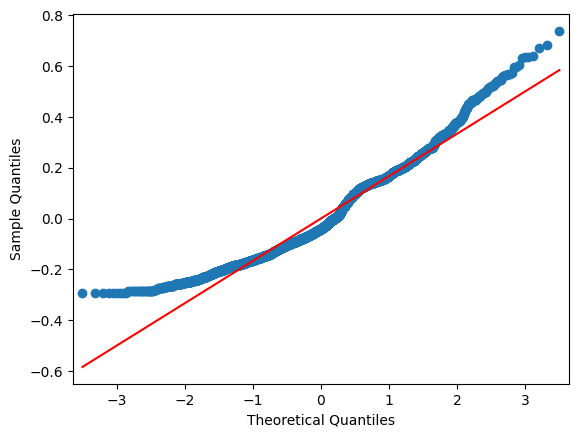

In [104]:
sm.qqplot(model.resid, line ='s');

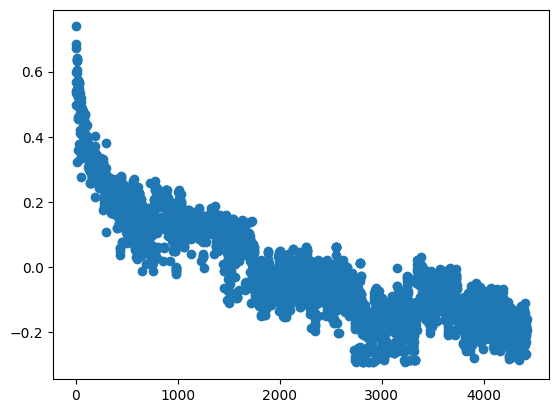

In [105]:
r = model.resid
plt.scatter(range(len(r)), r);

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
exog = model.model.exog
names = model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i): .3f}')

VIF: AI_models:  17.423
VIF: Tasks:  30.554
VIF: AI_Workload_Ratio:  7.181


In [98]:
df_vif = filtered_df[['AI_models', 'AI_Workload_Ratio']]
covariate = ' + '.join(df_vif)
model = smf.ols(f'AI_Impact ~ {covariate}', data = filtered_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AI_Impact   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     382.6
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          5.74e-154
Time:                        20:42:56   Log-Likelihood:                 1621.4
No. Observations:                4420   AIC:                            -3237.
Df Residuals:                    4417   BIC:                            -3218.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4953      0.00

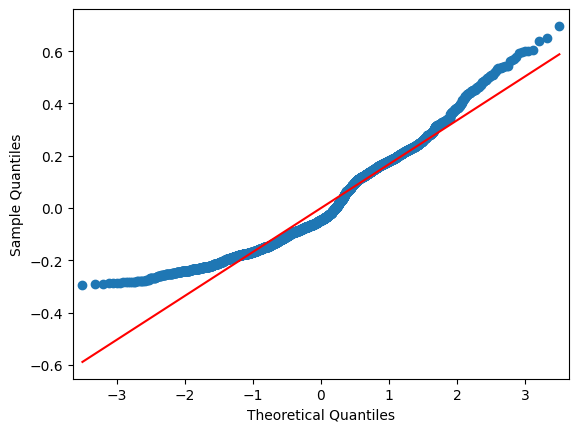

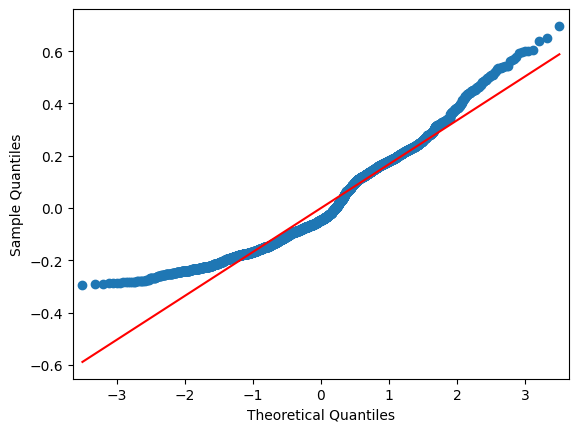

In [99]:
sm.qqplot(model.resid, line ='s')

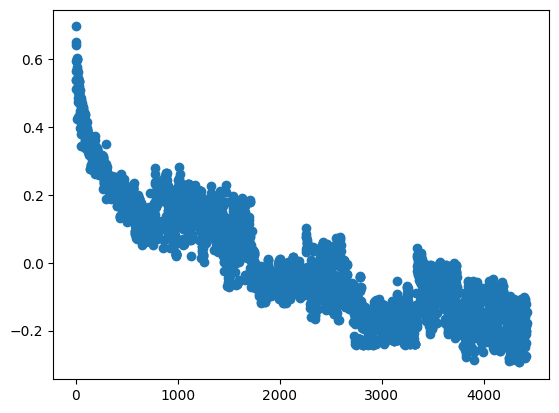

In [101]:
r = model.resid
plt.scatter(range(len(r)), r);

In [93]:
df_vif = filtered_df[['AI_Workload_Ratio']]
covariate = ' + '.join(df_vif)
model = smf.ols(f'AI_Impact ~ {covariate}', data = filtered_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              AI_Impact   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     359.7
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           3.53e-77
Time:                        20:09:11   Log-Likelihood:                 1441.3
No. Observations:                4420   AIC:                            -2879.
Df Residuals:                    4418   BIC:                            -2866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4460      0.00

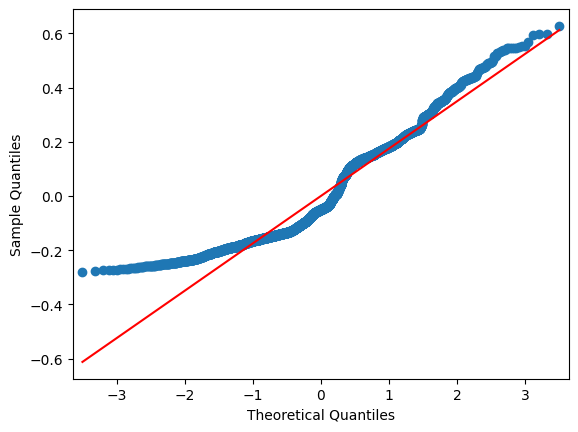

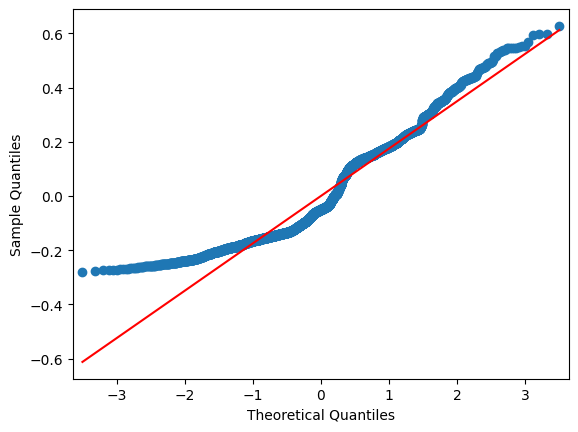

In [94]:
sm.qqplot(model.resid, line ='s')

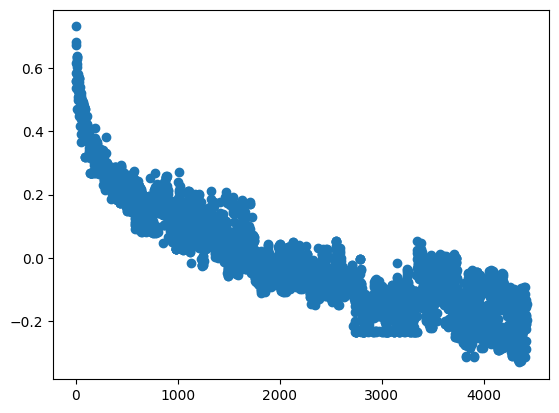

In [97]:
r = model.resid
plt.scatter(range(len(r)), r);